In [1]:
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import numpy as np

In [2]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [22]:
df = ratings.T
df =df.iloc[1:]
df = df.fillna(0)
X = normalize(df.values)

In [27]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

df['label'] = labels
#расстояние до ближайшего кластера (инициализация)
df['dist'] = 1

C:\Users\artem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
clust = {}
centroids = kmeans.cluster_centers_

for i in np.unique (labels):
    cluster_points = X[labels==i]
    # дистанция считается как евклидово расстояние
    distances = np.linalg.norm(cluster_points - centroids[i], axis=1) 
    df.loc[labels==i,'dist'] = distances
    clust[i] = list(df[labels==i].sort_values('dist').head(10).index)
    

In [13]:
clust

{0: ['nas',
  'jay-z',
  'kanye west',
  'lupe the gorilla',
  'a tribe called quest',
  "the roots featuring d'angelo",
  'gangstarr',
  'little brother',
  "lil' wayne",
  'murs and 9th wonder'],
 1: ['fall out boy',
  'the all-americian rejects',
  'paramore',
  'kelly clarkson',
  'john mayer',
  'the fray',
  'maroon5',
  'dashboard confesssional',
  'somethings corporate',
  'coldplay'],
 2: ['brand new',
  'blink-182',
  'alkaline trio',
  'against me!',
  'underoath',
  'descendents',
  'new found glory',
  'less than jake',
  'thrice',
  'chiodos'],
 3: ['the beatles',
  'the rolling stones',
  'dylan. bob',
  'who',
  'led zeppelin.',
  'miles davis.',
  'simon and garfunkel',
  'young, neil',
  'pink fluid',
  'velvet underground'],
 4: ['radiohead',
  'the arcade fire',
  'the shins',
  'sufjan stevens',
  'belle and sebastian',
  'broken social scene',
  'the pixies',
  'animal collective',
  'modest mouse',
  'spoon']}

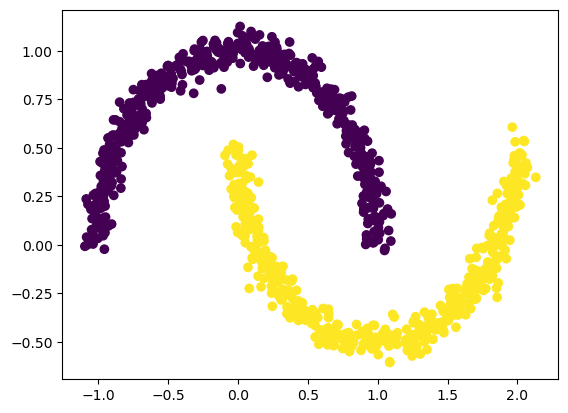

In [38]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

# Генерация данных
X, y = make_moons(n_samples=1000, noise=0.05)

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()